In [35]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#define problem
problem = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=100)

In [9]:
#run randomized optimization algorithm
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name="RHC_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=2 ** np.arange(13),
                    max_attempts=500,
                    restart_list=[25, 75, 100])
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [4]:
# run simulated annealing optimization algorithm
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=500,
                  temperature_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [5]:
#run genetic algorithm optimization algorithm
ga = mlrose_hiive.GARunner(problem=problem,
                  experiment_name="GA_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=200,
                  population_sizes=[200, 500, 1000, 2000, 3000, 4000],
                  mutation_rates=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats_ga, df_run_curves_ga = ga.run() 

In [6]:
#run mimic optimization algorithm
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                      experiment_name="MMC_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=2 ** np.arange(13),
                      max_attempts=200,
                      keep_percent_list=[0.25, 0.5, 0.75],
                      population_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000])

# the two data frames will contain the results
df_run_stats_mmc, df_run_curves_mmc = mmc.run()

In [7]:
df_run_curves_rhc.head

<bound method NDFrame.head of         Iteration      Time  Fitness   FEvals  Restarts  max_iters  \
0               0  0.001016     46.0      0.0        25       4096   
1               1  0.050937     48.0      2.0        25       4096   
2               2  0.063738     50.0      4.0        25       4096   
3               3  0.076493     52.0      6.0        25       4096   
4               4  0.077160     54.0      8.0        25       4096   
...           ...       ...      ...      ...       ...        ...   
157054        669  0.720135     80.0  80202.0       100       4096   
157055        670  0.721175     80.0  80203.0       100       4096   
157056        671  0.722215     80.0  80204.0       100       4096   
157057        672  0.723255     80.0  80205.0       100       4096   
157058        673  0.724294     80.0  80206.0       100       4096   

        current_restart  
0                     0  
1                     0  
2                     0  
3                     0  

Text(0, 0.5, 'Fitness')

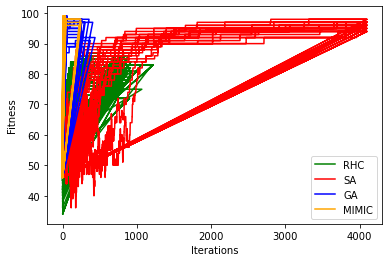

In [10]:
# Plot Iterations vs Fitness
plt.plot(df_run_curves_rhc['Iteration'], df_run_curves_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_run_curves_sa['Iteration'], df_run_curves_sa['Fitness'], label='SA', color='red')
plt.plot(df_run_curves_ga['Iteration'], df_run_curves_ga['Fitness'], label='GA', color='blue')
plt.plot(df_run_curves_mmc['Iteration'], df_run_curves_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

In [16]:
# Plot Iterations vs Fitness
df_stats_rhc_best = df_run_stats_rhc.loc[(df_run_stats_rhc['Restarts']==75) & (df_run_stats_rhc['current_restart']==59)]
df_stats_sa_best = df_run_stats_sa.loc[(df_run_stats_sa['schedule_type']=='geometric') & (df_run_stats_sa['schedule_init_temp']==5)]
df_stats_ga_best = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==2000) & (df_run_stats_ga['Mutation Rate']==0.4)]
df_stats_mmc_best = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==5000) & (df_run_stats_mmc['Keep Percent']==0.25)]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
168,0,46.0,0,0.014661,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",False,5000,0.25,4096
169,1,72.0,2,4.736070,"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",False,5000,0.25,4096
170,2,79.0,4,9.271618,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
171,4,85.0,8,18.364309,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
172,8,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
173,16,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
174,32,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
175,64,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
176,128,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096
177,256,99.0,16,36.973545,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",False,5000,0.25,4096


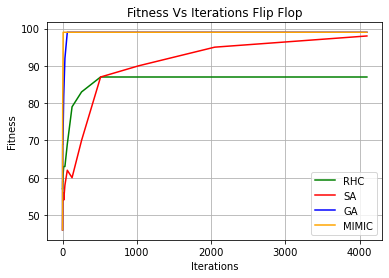

In [58]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Fitness'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Fitness'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Fitness'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness Vs Iterations Flip Flop")
plt.savefig("Fitness Vs Iterations Flip Flop")

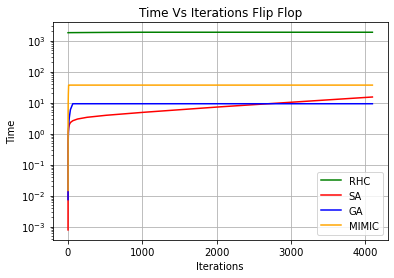

In [59]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Time'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Time'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Time'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Time'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Time")
plt.yscale('log')
plt.grid()
plt.title("Time Vs Iterations Flip Flop")
plt.savefig("Time Vs Iterations Flip Flop")

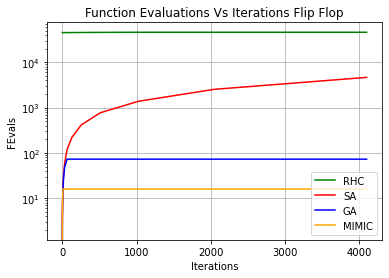

In [60]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['FEvals'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['FEvals'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['FEvals'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['FEvals'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("FEvals")
plt.yscale('log')
plt.grid()
plt.title("Function Evaluations Vs Iterations Flip Flop")
plt.savefig("Function Evaluations Vs Iterations Flip Flop")

In [29]:
df_stats_sa_best

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
112,0,46.0,0,0.000780,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.999961,5,4096,NaN
113,1,48.0,2,0.374516,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.981215,5,4096,NaN
114,2,50.0,4,0.731953,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.963353,5,4096,NaN
115,4,54.0,8,1.150070,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.942540,5,4096,NaN
116,8,56.0,15,1.522901,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",geometric,5,0.99,0.001,4.924054,5,4096,NaN
117,16,54.0,30,1.914258,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...",geometric,5,0.99,0.001,4.904725,5,4096,NaN
118,32,58.0,59,2.291380,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, ...",geometric,5,0.99,0.001,4.886170,5,4096,NaN
119,64,62.0,118,2.615360,"[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.870286,5,4096,NaN
120,128,60.0,219,2.971249,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...",geometric,5,0.99,0.001,4.852897,5,4096,NaN
121,256,70.0,417,3.374504,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, ...",geometric,5,0.99,0.001,4.833269,5,4096,NaN


In [24]:
problem1 = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=20)
problem2 = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=40)
problem3 = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=60)
problem4 = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=80)
problem5 = mlrose_hiive.FlipFlopGenerator.generate(seed=42, size=100)

In [30]:
#run randomized optimization algorithm
rhc1 = mlrose_hiive.RHCRunner(problem=problem1,
                    experiment_name="RHC1_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc1, df_run_curves_rhc1 = rhc1.run()

rhc2 = mlrose_hiive.RHCRunner(problem=problem2,
                    experiment_name="RHC2_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc2, df_run_curves_rhc2 = rhc2.run()

rhc3 = mlrose_hiive.RHCRunner(problem=problem3,
                    experiment_name="RHC3_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc3, df_run_curves_rhc3 = rhc3.run()

rhc4 = mlrose_hiive.RHCRunner(problem=problem4,
                    experiment_name="RHC4_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc4, df_run_curves_rhc4 = rhc4.run()

rhc5 = mlrose_hiive.RHCRunner(problem=problem5,
                    experiment_name="RHC5_FlipFlop",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc5, df_run_curves_rhc5 = rhc5.run()


In [31]:
# run simulated annealing optimization algorithm
sa1 = mlrose_hiive.SARunner(problem=problem1,
                  experiment_name="SA1_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[5],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa1, df_run_curves_sa1 = sa1.run()

sa2 = mlrose_hiive.SARunner(problem=problem2,
                  experiment_name="SA2_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[5],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa2, df_run_curves_sa2 = sa2.run()

sa3 = mlrose_hiive.SARunner(problem=problem3,
                  experiment_name="SA3_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[5],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa3, df_run_curves_sa3 = sa3.run()

sa4 = mlrose_hiive.SARunner(problem=problem4,
                  experiment_name="SA4_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[5],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa4, df_run_curves_sa4 = sa4.run()

sa5 = mlrose_hiive.SARunner(problem=problem5,
                  experiment_name="SA5_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[5],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa5, df_run_curves_sa5 = sa5.run()

In [32]:
#run genetic algorithm optimization algorithm
ga1 = mlrose_hiive.GARunner(problem=problem1,
                  experiment_name="GA1_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[2000],
                  mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats_ga1, df_run_curves_ga1 = ga1.run()

ga2 = mlrose_hiive.GARunner(problem=problem2,
                  experiment_name="GA2_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[2000],
                  mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats_ga2, df_run_curves_ga2 = ga2.run() 

ga3 = mlrose_hiive.GARunner(problem=problem3,
                  experiment_name="GA3_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[2000],
                  mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats_ga3, df_run_curves_ga3 = ga3.run() 

ga4 = mlrose_hiive.GARunner(problem=problem4,
                  experiment_name="GA4_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[2000],
                  mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats_ga4, df_run_curves_ga4 = ga4.run() 

ga5 = mlrose_hiive.GARunner(problem=problem5,
                  experiment_name="GA5_FlipFlop",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[2000],
                  mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats_ga5, df_run_curves_ga5 = ga5.run()

In [33]:
#run mimic optimization algorithm
mmc1 = mlrose_hiive.MIMICRunner(problem=problem1,
                      experiment_name="MMC1_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [5000])

# the two data frames will contain the results
df_run_stats_mmc1, df_run_curves_mmc1 = mmc1.run()

mmc2 = mlrose_hiive.MIMICRunner(problem=problem2,
                      experiment_name="MMC2_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [5000])

# the two data frames will contain the results
df_run_stats_mmc2, df_run_curves_mmc2 = mmc2.run()

mmc3 = mlrose_hiive.MIMICRunner(problem=problem3,
                      experiment_name="MMC3_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [5000])

# the two data frames will contain the results
df_run_stats_mmc3, df_run_curves_mmc3 = mmc3.run()

mmc4 = mlrose_hiive.MIMICRunner(problem=problem4,
                      experiment_name="MMC4_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [5000])

# the two data frames will contain the results
df_run_stats_mmc4, df_run_curves_mmc4 = mmc4.run()

mmc5 = mlrose_hiive.MIMICRunner(problem=problem5,
                      experiment_name="MMC5_FlipFlop",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [5000])

# the two data frames will contain the results
df_run_stats_mmc5, df_run_curves_mmc5 = mmc5.run()

In [43]:
df_run_stats_rhc1['Fitness'].max()

18.0

In [44]:
data_rhc = [{'Problem Size': 20, 'Fitness': df_run_stats_rhc1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_rhc2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_rhc3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_rhc4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_rhc5['Fitness'].max()}]
df_rhc = pd.DataFrame(data_rhc)

In [45]:
data_sa = [{'Problem Size': 20, 'Fitness': df_run_stats_sa1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_sa2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_sa3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_sa4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_sa5['Fitness'].max()}]
df_sa = pd.DataFrame(data_sa)

In [46]:
data_ga = [{'Problem Size': 20, 'Fitness': df_run_stats_ga1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_ga2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_ga3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_ga4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_ga5['Fitness'].max()}]
df_ga = pd.DataFrame(data_ga)

In [47]:
data_mmc = [{'Problem Size': 20, 'Fitness': df_run_stats_mmc1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_mmc2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_mmc3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_mmc4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_mmc5['Fitness'].max()}]
df_mmc = pd.DataFrame(data_mmc)

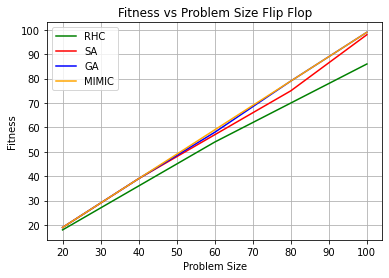

In [61]:
plt.plot(df_rhc['Problem Size'], df_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_sa['Problem Size'], df_sa['Fitness'], label='SA', color='red')
plt.plot(df_ga['Problem Size'], df_ga['Fitness'], label='GA', color='blue')
plt.plot(df_mmc['Problem Size'], df_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness vs Problem Size Flip Flop")
plt.savefig("Fitness vs Problem Size Flip Flop")

In [55]:
#showing pop size effect GA
df_popsize_ga = df_run_stats_ga.loc[(df_run_stats_ga['Iteration']==4096) & (df_run_stats_ga['Mutation Rate']==0.1)]

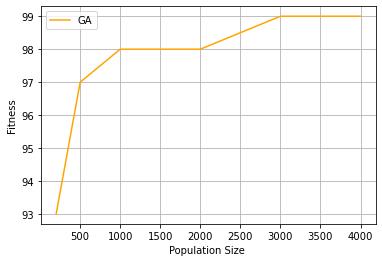

In [56]:
plt.plot(df_popsize_ga['Population Size'], df_popsize_ga['Fitness'], label='GA', color='orange')
plt.legend(loc="best")
plt.xlabel("Population Size ")
plt.ylabel("Fitness")
plt.grid()

In [77]:
# 200, 500, 1000, 2000, 3000, 4000
df_popsize_ga_200 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==200) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]
df_popsize_ga_500 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==500) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]
df_popsize_ga_1000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==1000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]
df_popsize_ga_2000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==2000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]
df_popsize_ga_3000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==3000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]
df_popsize_ga_4000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==4000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=64)]

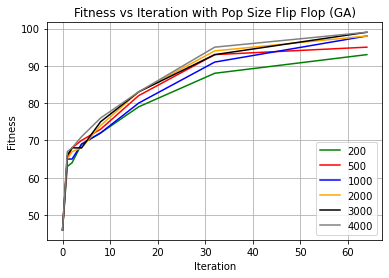

In [82]:
plt.plot(df_popsize_ga_200['Iteration'], df_popsize_ga_200['Fitness'], label='200', color='green')
plt.plot(df_popsize_ga_500['Iteration'], df_popsize_ga_500['Fitness'], label='500', color='red')
plt.plot(df_popsize_ga_1000['Iteration'], df_popsize_ga_1000['Fitness'], label='1000', color='blue')
plt.plot(df_popsize_ga_2000['Iteration'], df_popsize_ga_2000['Fitness'], label='2000', color='orange')
plt.plot(df_popsize_ga_3000['Iteration'], df_popsize_ga_3000['Fitness'], label='3000', color='black')
plt.plot(df_popsize_ga_4000['Iteration'], df_popsize_ga_4000['Fitness'], label='4000', color='grey')
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
#plt.legend
plt.grid()
plt.title("Fitness vs Iteration with Pop Size Flip Flop (GA)")
plt.savefig("Fitness vs Iteration with Pop Size Flip Flop (GA)")

In [75]:
# 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000
df_popsize_mmc_1000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==1000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_2000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==2000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_3000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==3000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_4000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==4000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_5000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==5000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_6000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==6000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_8000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==8000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]
df_popsize_mmc_10000 = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==10000) & (df_run_stats_mmc['Keep Percent']==0.25) & (df_run_stats_mmc['Iteration']<=16)]

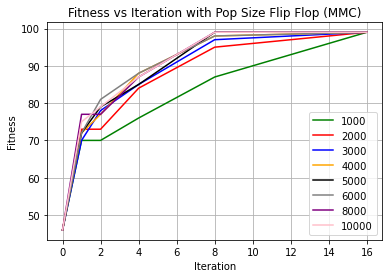

In [80]:
plt.plot(df_popsize_mmc_1000['Iteration'], df_popsize_mmc_1000['Fitness'], label='1000', color='green')
plt.plot(df_popsize_mmc_2000['Iteration'], df_popsize_mmc_2000['Fitness'], label='2000', color='red')
plt.plot(df_popsize_mmc_3000['Iteration'], df_popsize_mmc_3000['Fitness'], label='3000', color='blue')
plt.plot(df_popsize_mmc_4000['Iteration'], df_popsize_mmc_4000['Fitness'], label='4000', color='orange')
plt.plot(df_popsize_mmc_5000['Iteration'], df_popsize_mmc_5000['Fitness'], label='5000', color='black')
plt.plot(df_popsize_mmc_6000['Iteration'], df_popsize_mmc_6000['Fitness'], label='6000', color='grey')
plt.plot(df_popsize_mmc_8000['Iteration'], df_popsize_mmc_8000['Fitness'], label='8000', color='purple')
plt.plot(df_popsize_mmc_10000['Iteration'], df_popsize_mmc_10000['Fitness'], label='10000', color='pink')
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness vs Iteration with Pop Size Flip Flop (MMC)")
plt.savefig("Fitness vs Iteration with Pop Size Flip Flop (MMC)")